Visualizing Errors


In [4]:
"""                                        Basic Errorbars                                  """

'                                        Basic Errorbars                                  '

In [5]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import numpy as np

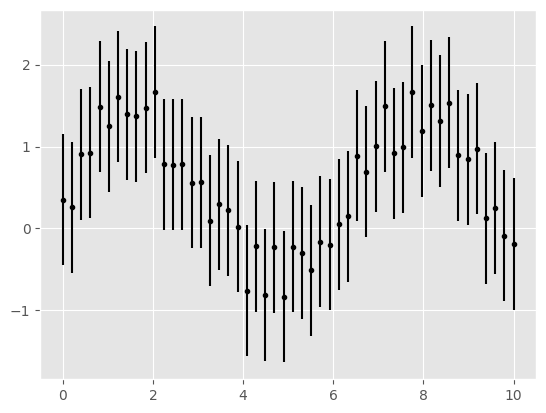

In [6]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.rand(50)
plt.errorbar(x, y, yerr = dy, fmt = ".k")
plt.show()

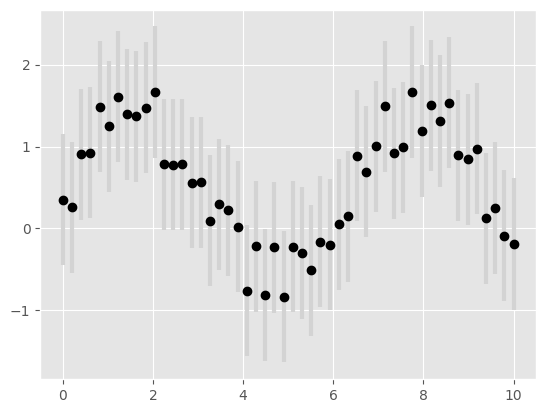

In [7]:
plt.errorbar(x, y, yerr= dy, fmt = "o", color = "black",
             ecolor= "lightgray", elinewidth= 3, capsize= 0)
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_14012\2597302789.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  plt.errorbar(x, y, color = "red", fmt= ".k", yerr= dy1,


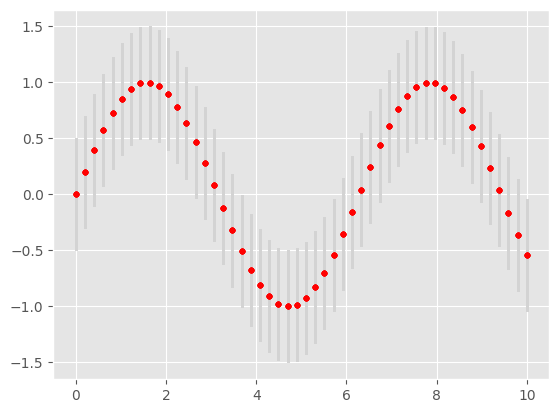

In [8]:
def func(x1, dy1):
    x = np.linspace(0, x1, 50)
    for _ in range(x1):
        y = np.sin(x)
        plt.errorbar(x, y, color = "red", fmt= ".k", yerr= dy1,
                     ecolor= "lightgray", elinewidth= 2, capsize= 0)
    return y

func(10, 0.5)
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_14012\2657700831.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  plt.errorbar(x, y1, color = "red", yerr= dy, fmt= ".k", ecolor= "lightgray")


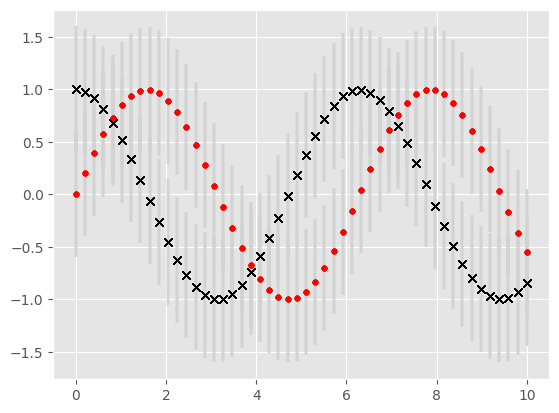

In [9]:
def func2(x_max, dy):

    x = np.linspace(0, x_max, 50)

    for _ in range(x_max):

        y1 = np.sin(x)
        y2 = np.cos(x)

        plt.errorbar(x, y1, color = "red", yerr= dy, fmt= ".k", ecolor= "lightgray")
        plt.errorbar(x, y2, color = "k", yerr= dy, fmt= "x", ecolor= "lightgray")

    return y1, y2

func2(10, 0.6)
plt.show()
    

In [10]:
"""                                     Continuous Errors                                     """

'                                     Continuous Errors                                     '

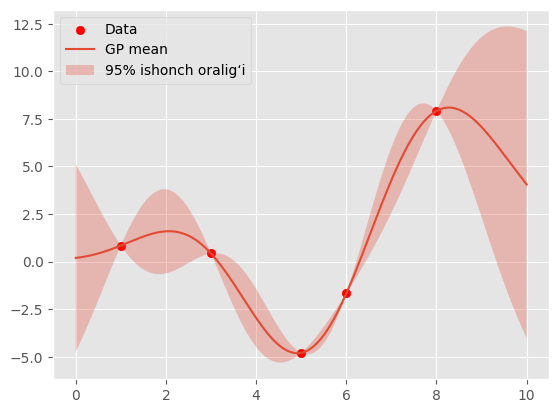

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Haqiqiy funksiya
def model(x):
    return x * np.sin(x)

# Ma'lumotlar
xdata = np.array([1, 3, 5, 6, 8])[:, None]
ydata = model(xdata).ravel()

# Kernel (kovariatsiya funksiyasi)
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))

# Gaussian Process modeli
gp = GaussianProcessRegressor(
    kernel=kernel,
    alpha=1e-6,
    normalize_y=True
)

# Modelni o‘rgatish
gp.fit(xdata, ydata)

# Bashorat
xfit = np.linspace(0, 10, 1000)[:, None]
yfit, sigma = gp.predict(xfit, return_std=True)

# Grafik
plt.scatter(xdata, ydata, c='red', label='Data')
plt.plot(xfit, yfit, label='GP mean')
plt.fill_between(
    xfit.ravel(),
    yfit - 2*sigma,
    yfit + 2*sigma,
    alpha=0.3,
    label='95% ishonch oralig‘i'
)

plt.legend()
plt.show()
